<a href="https://colab.research.google.com/github/AnkitBou/LR_Delivery_Time_Prediction_Ankit_Bougal/blob/main/LR_Delivery_Time_Prediction_Ankit_Bougal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [ ]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_columns:
    df[col] = df[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

# Extract hour and day of the week
df['created_hour'] = df['created_at'].dt.hour
df['created_day'] = df['created_at'].dt.day_name()


# Create a categorical feature 'isWeekend'
df['isWeekend'] = (df['created_at'].dt.dayofweek >= 5).astype(int)


In [ ]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time', 'created_day'], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)

y = df['delivery_time']
X = df.drop(['delivery_time'], axis=1)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns
numerical_cols = ['total_items', 'subtotal',
                  'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
                  'total_busy_dashers', 'total_outstanding_orders', 'distance',
                  'created_hour']

# Categorical columns
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

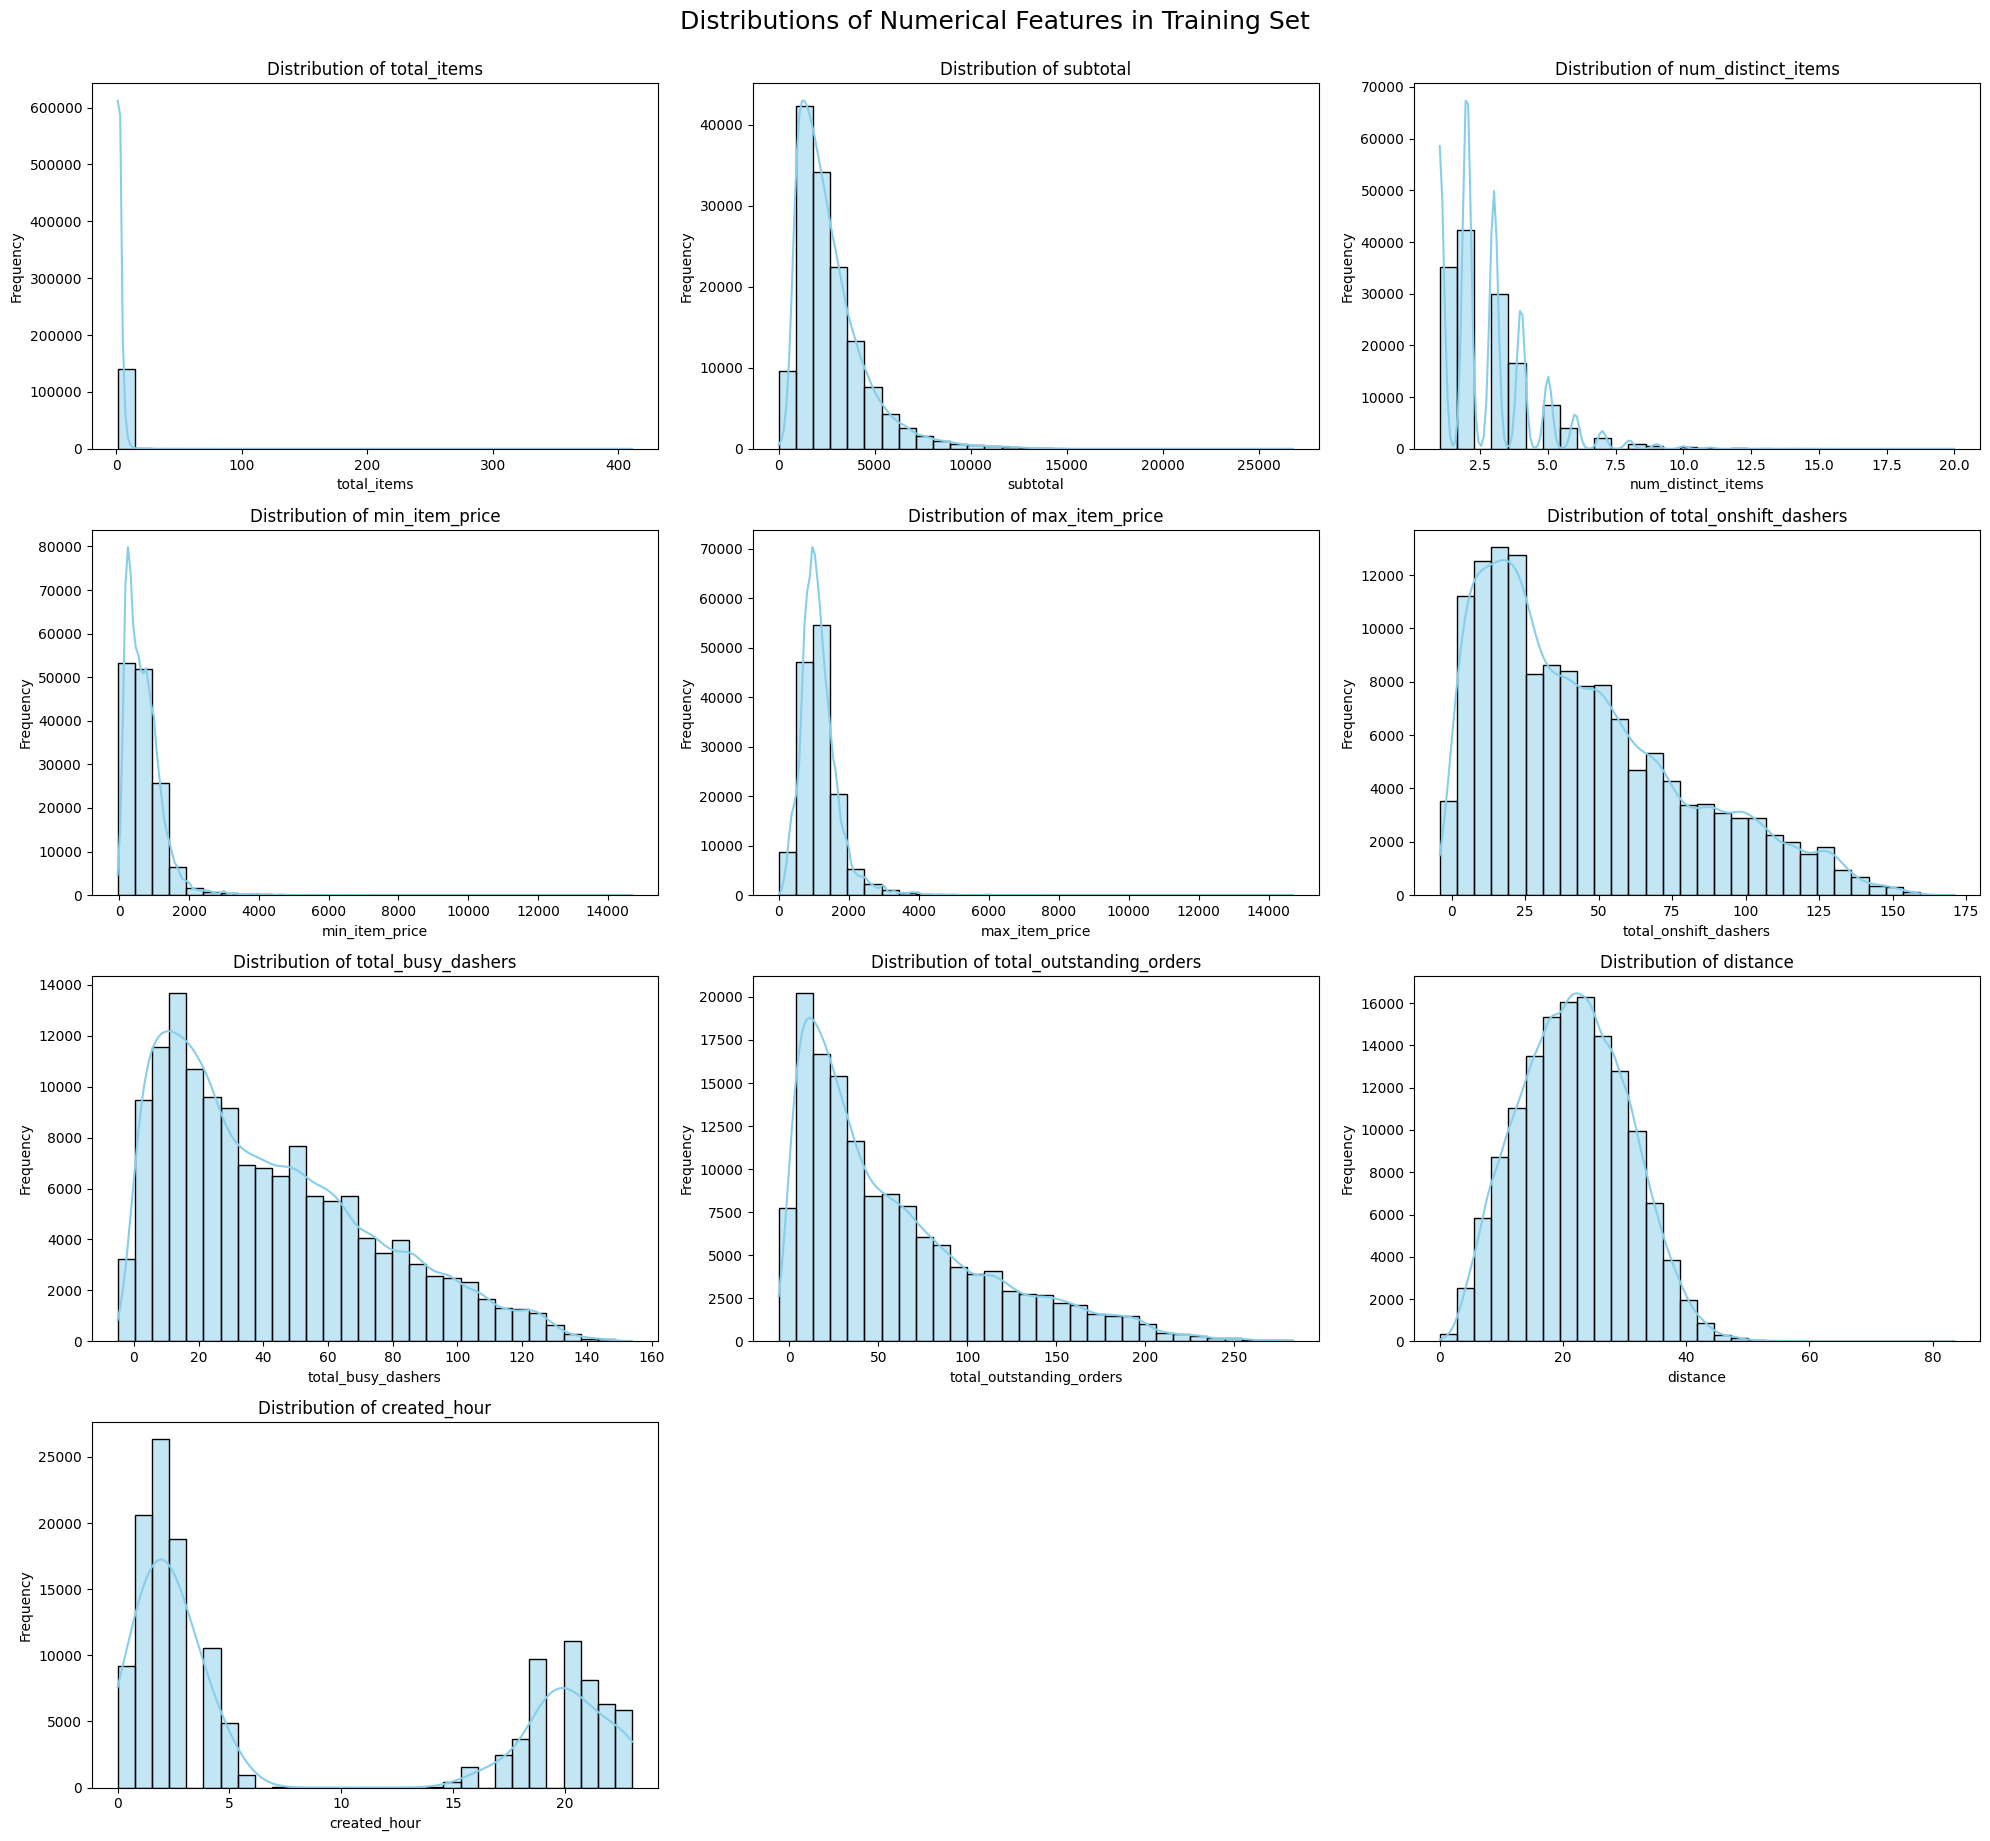

In [ ]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Distributions of Numerical Features in Training Set', fontsize=18, y=1.02)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

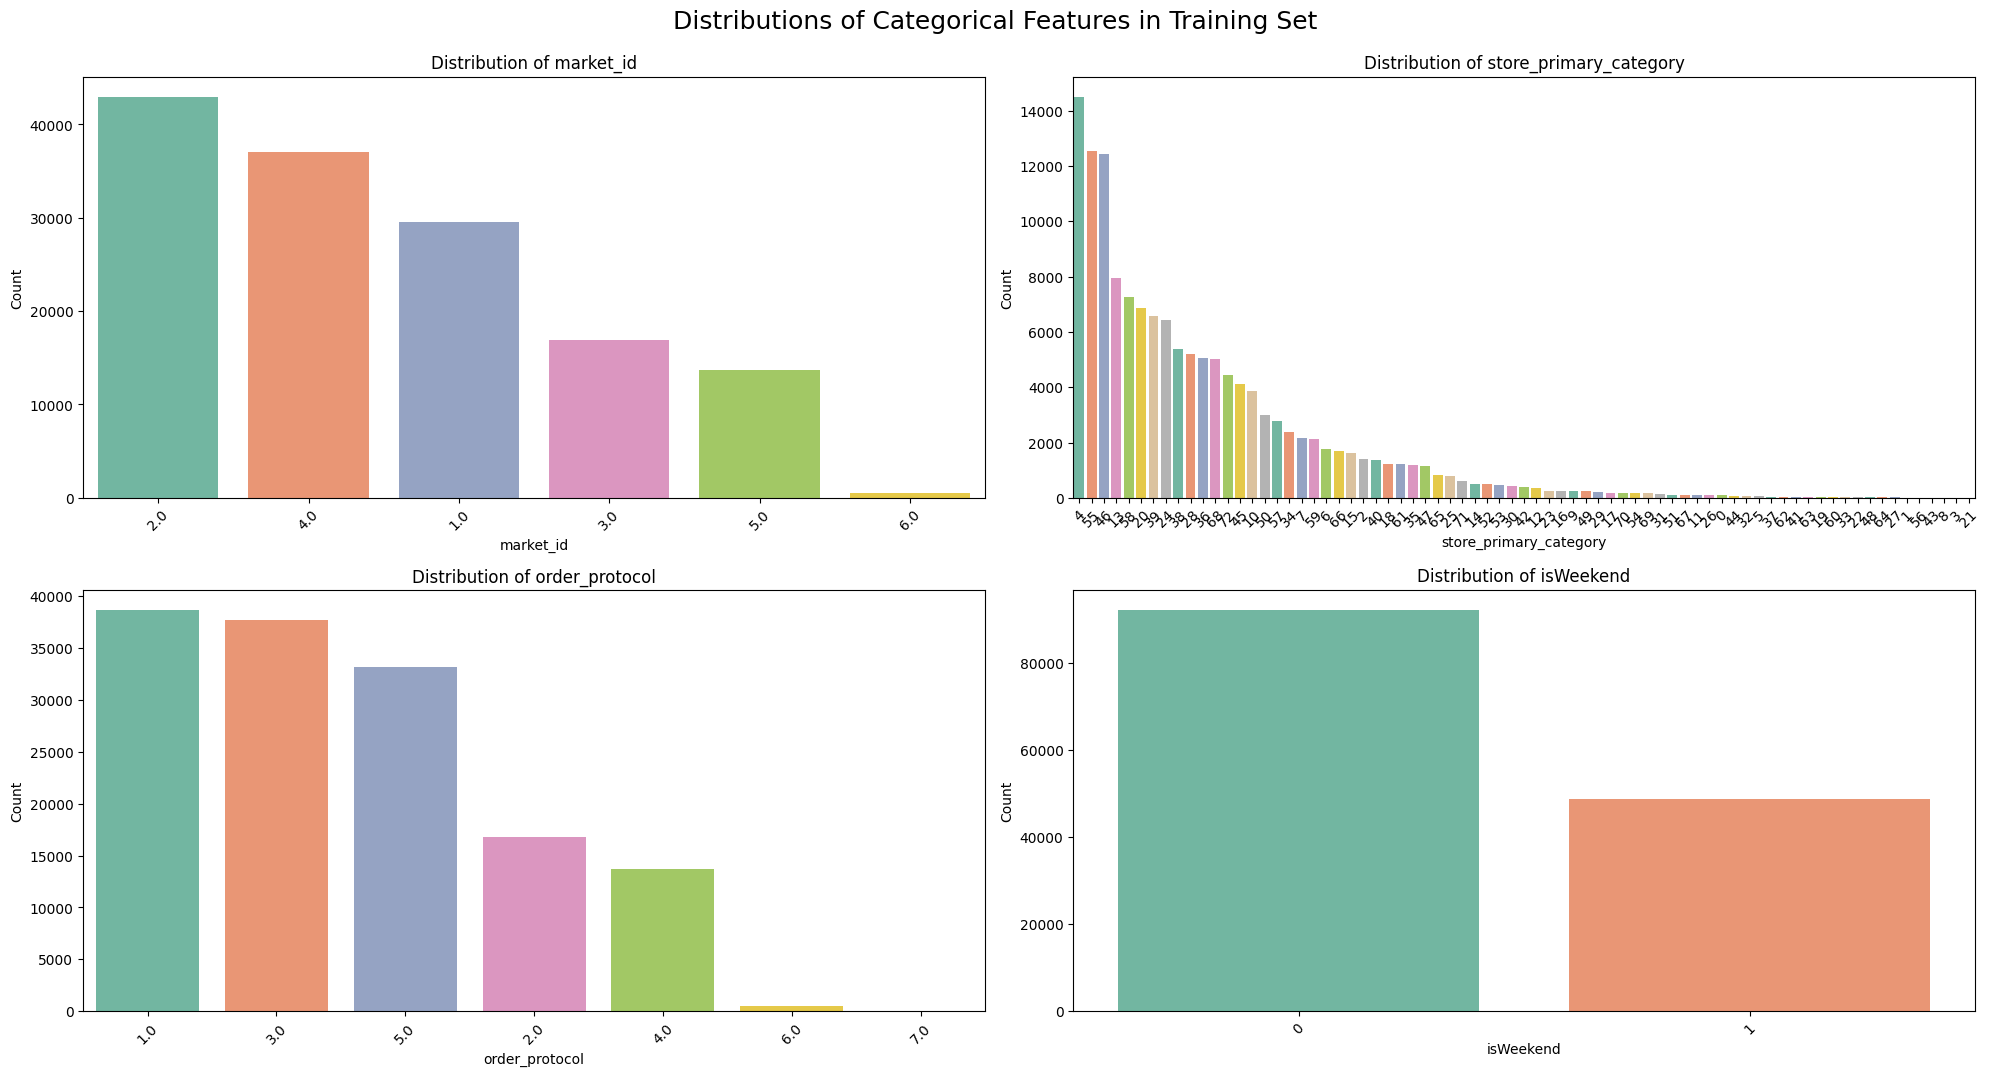

In [ ]:
# Distribution of categorical columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=X_train, x=col, palette='Set2', order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Distributions of Categorical Features in Training Set', fontsize=18, y=1.02)
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

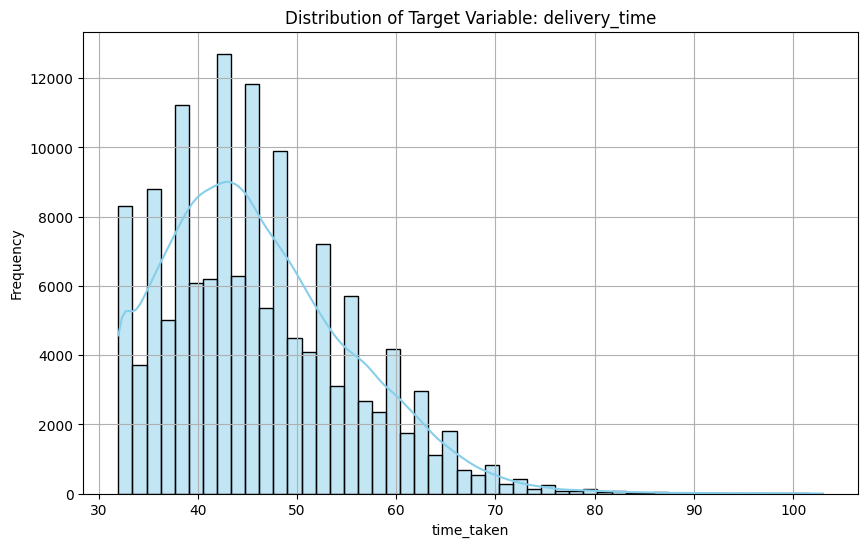

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Target Variable: delivery_time')
plt.xlabel('time_taken')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

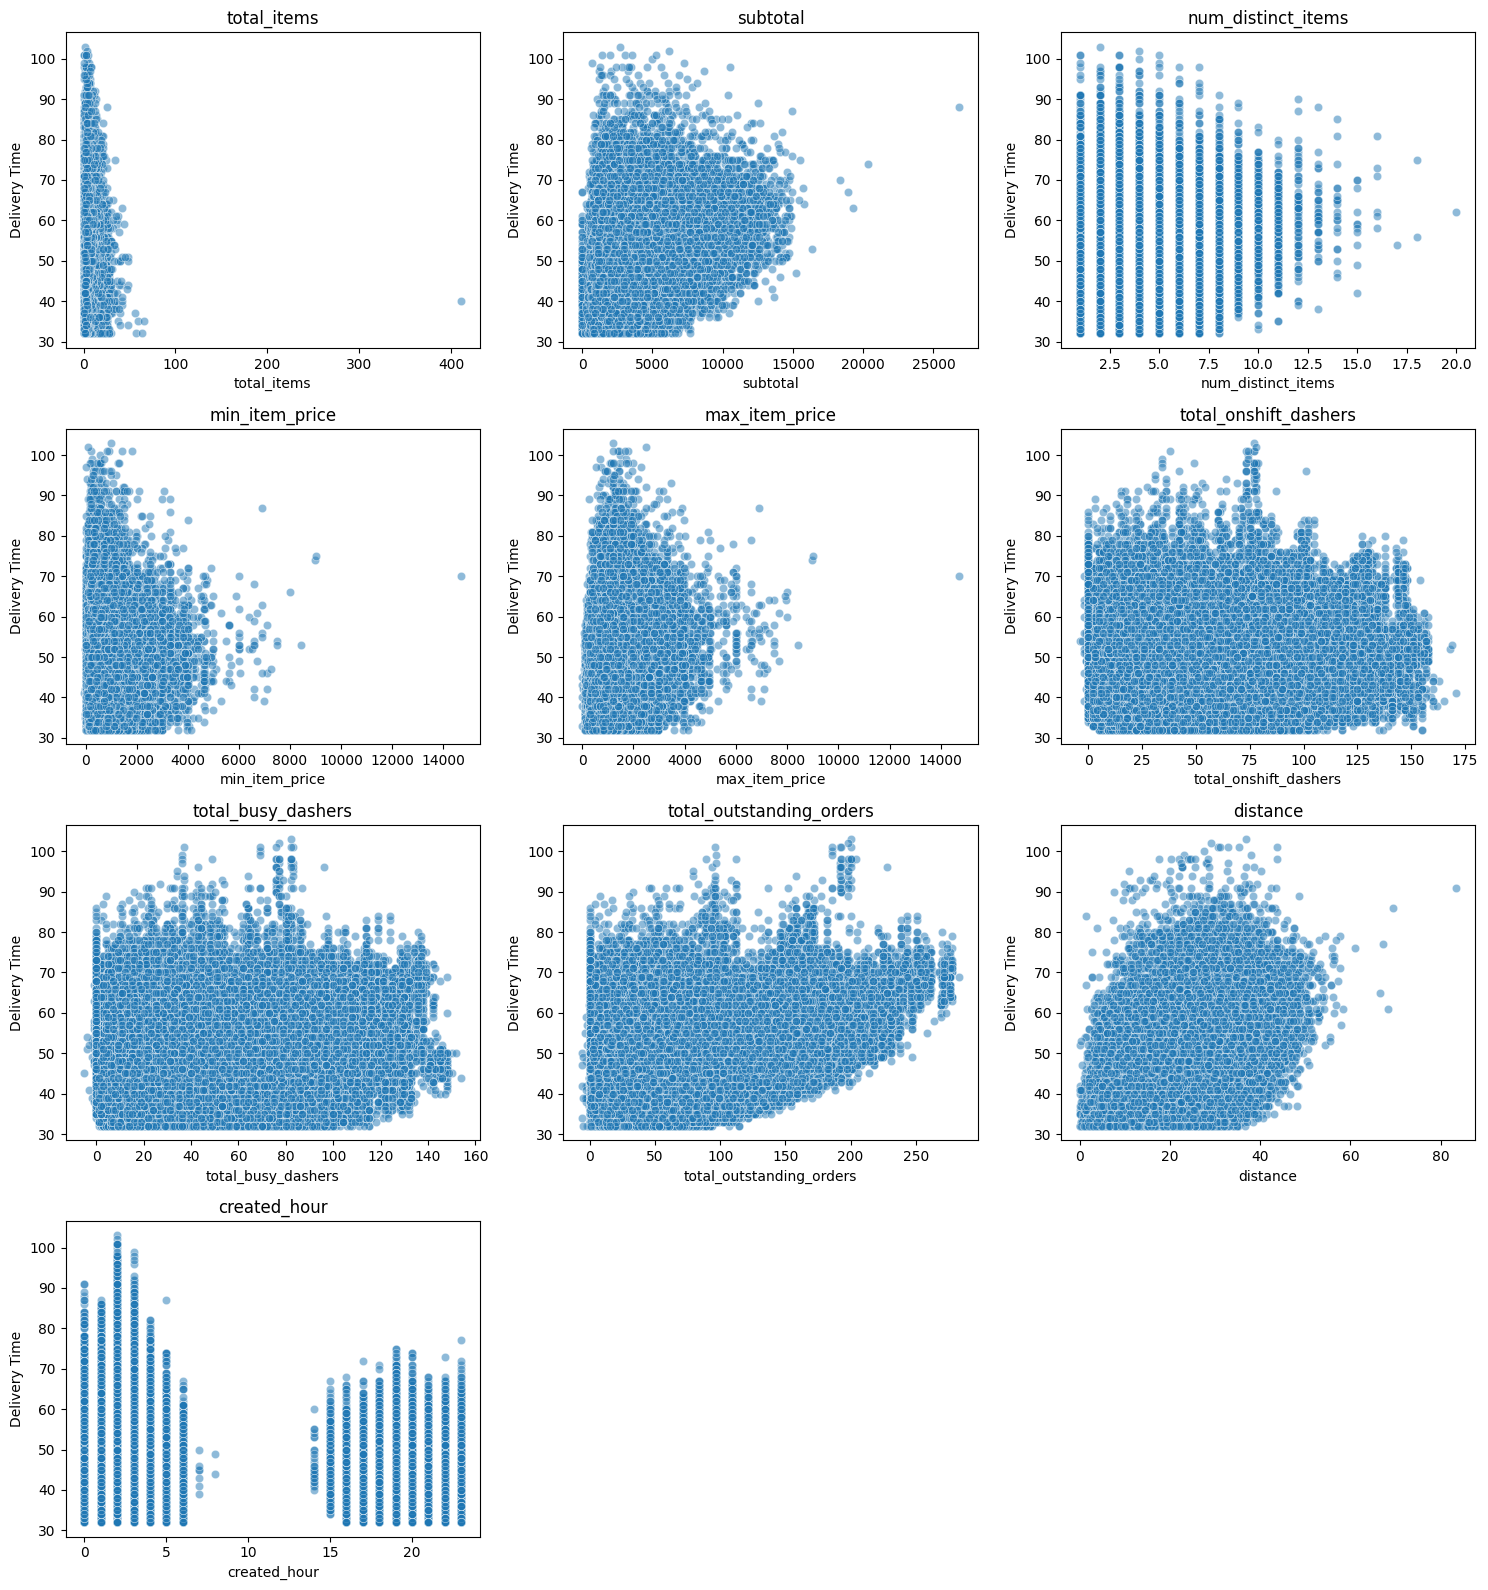

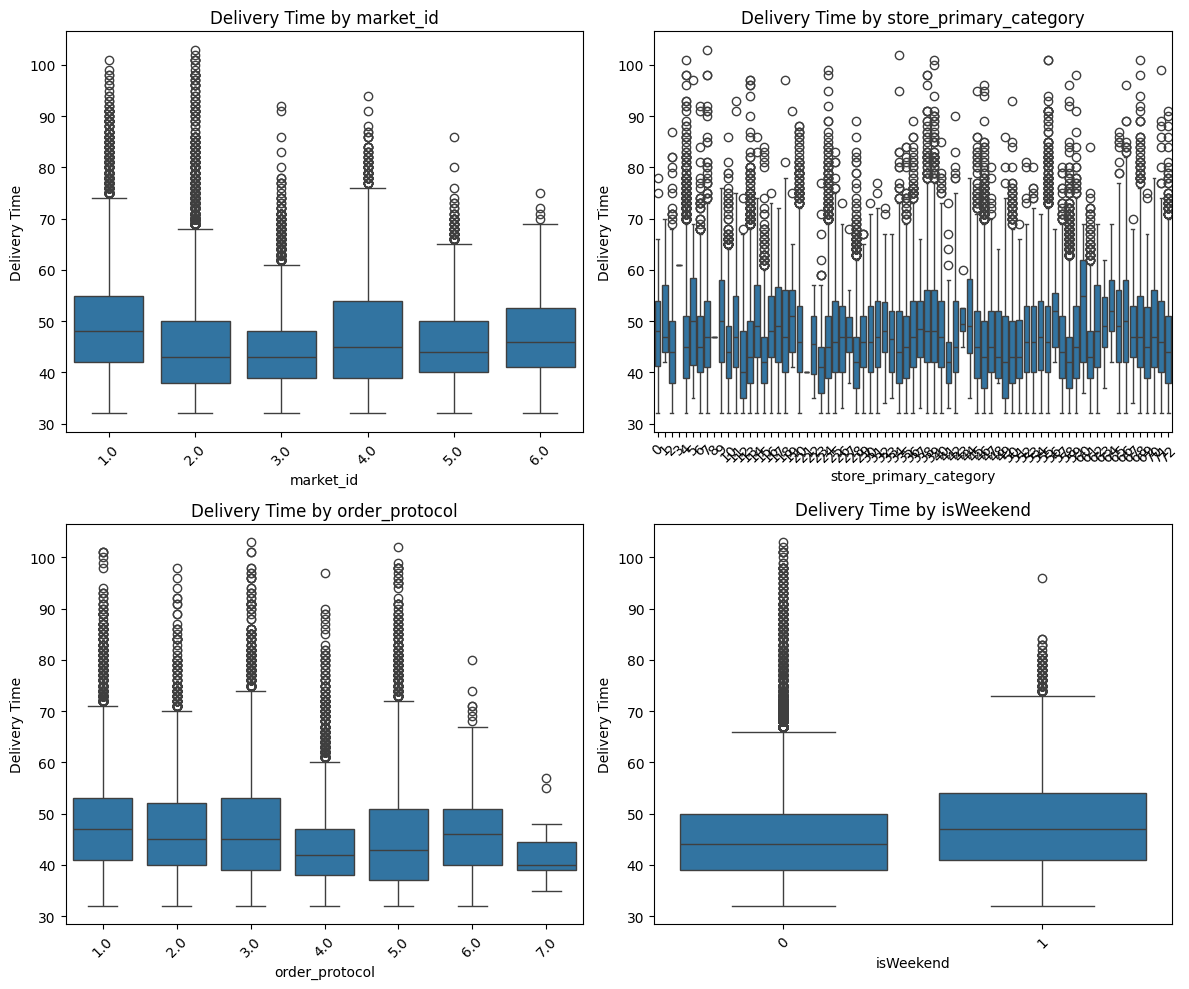

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

# Combine X_train and y_train for EDA
train_data = X_train.copy()
train_data['delivery_time'] = y_train


# Set up subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=train_data, x=col, y='delivery_time', alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Delivery Time')

plt.tight_layout()
plt.show()



# Set up subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=train_data, x=col, y='delivery_time')
    plt.title(f'Delivery Time by {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

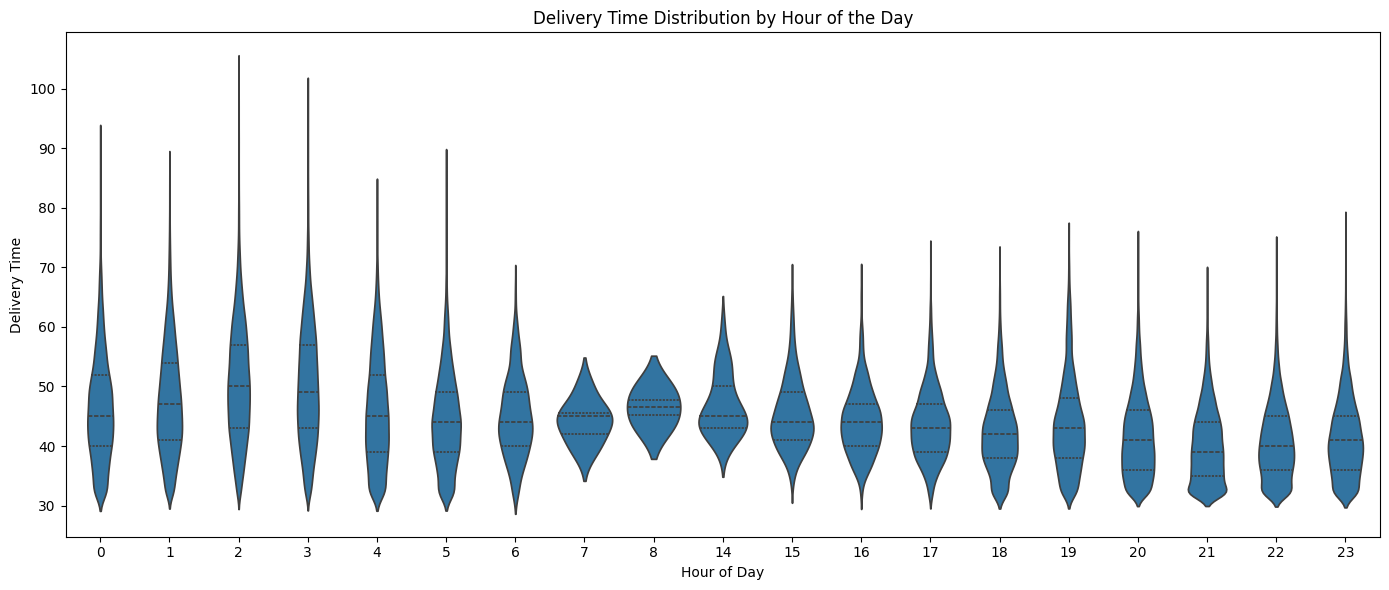

In [ ]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))
sns.violinplot(x='created_hour', y='delivery_time', data=train_data, inner='quartile')
plt.title('Delivery Time Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time')
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

Correlation with delivery_time:
delivery_time               1.000000
distance                    0.460237
subtotal                    0.413293
total_outstanding_orders    0.382738
num_distinct_items          0.312917
max_item_price              0.254416
total_items                 0.220891
total_busy_dashers          0.203979
total_onshift_dashers       0.168299
min_item_price              0.023411
created_hour               -0.344290
Name: delivery_time, dtype: float64


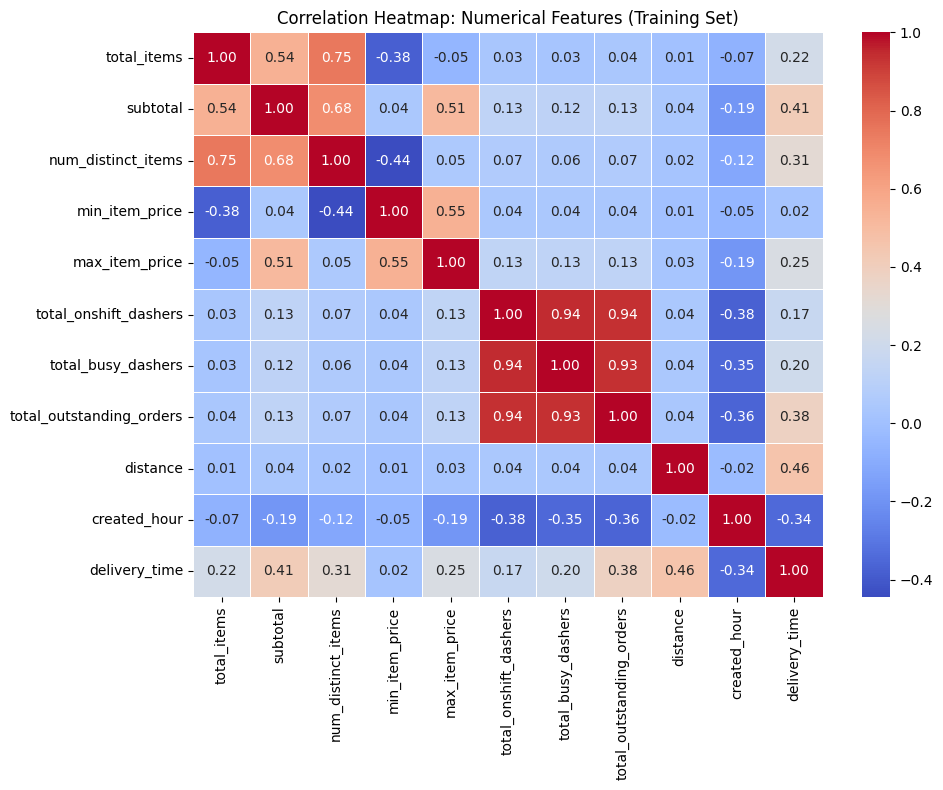

In [ ]:
# Plot the heatmap of the correlation matrix

# Correlation values for just the numerical features
correlations = train_data[numerical_cols + ['delivery_time']].corr()['delivery_time'].sort_values(ascending=False)

print("Correlation with delivery_time:")
print(correlations)

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_cols + ['delivery_time']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Numerical Features (Training Set)')
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

# Weakly correlated columns
weak_corr_cols = ['total_onshift_dashers', 'min_item_price', 'total_busy_dashers']

# Drop weakly correlated columns from df (without dropping 'delivery_time' here)
train_data = train_data.drop(columns=weak_corr_cols)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

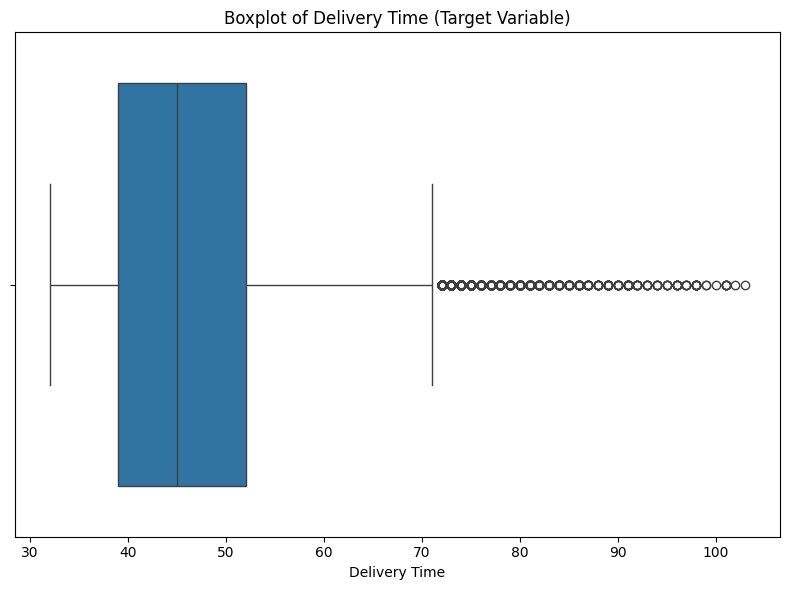

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='delivery_time')
plt.title('Boxplot of Delivery Time (Target Variable)')
plt.xlabel('Delivery Time')
plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

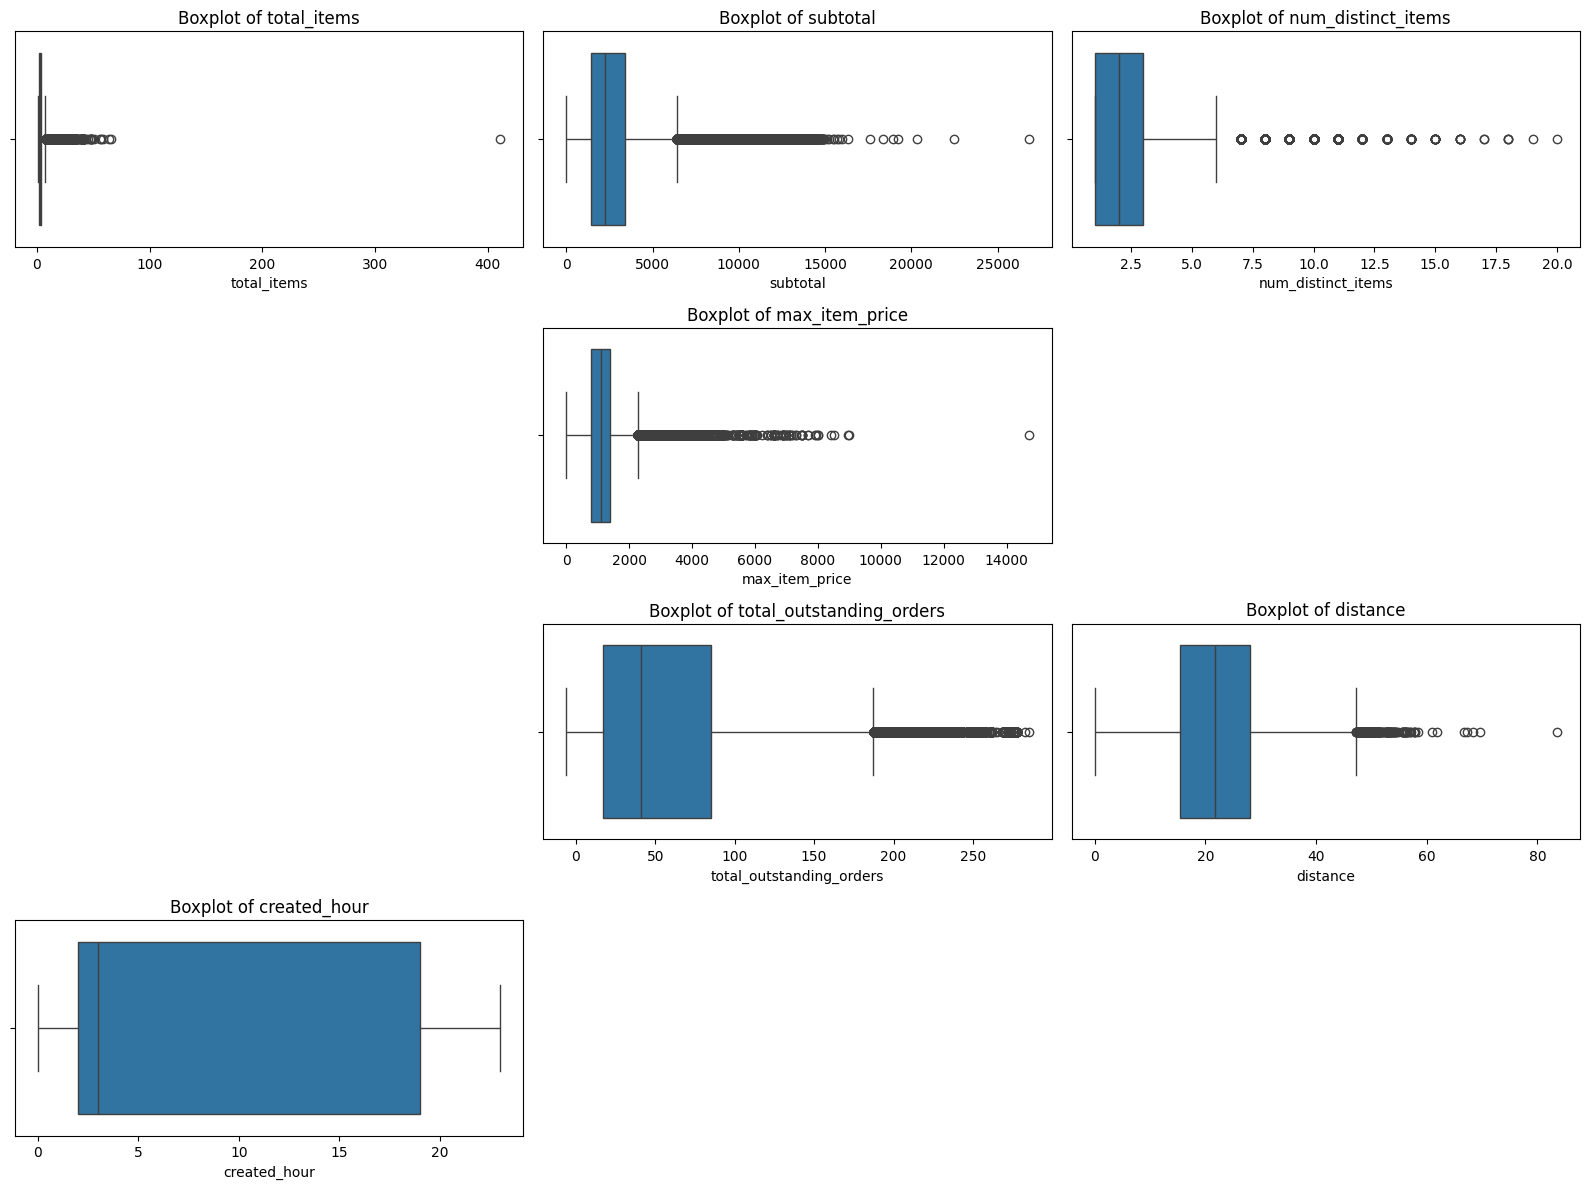

In [ ]:
# Handle outliers

# Plot boxplots for all numerical features, checking if the column exists in df
plt.figure(figsize=(16, 12))

# Iterate over all numerical columns and plot each, if present in df
for i, col in enumerate(numerical_cols):
    if col in train_data.columns:  # Check if the column exists in the dataframe
        plt.subplot(4, 3, i + 1)  # Adjust the number of rows and columns based on your data
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()

plt.show()



In [ ]:
# Handle outliers

# Handle outliers for delivery_time
train_data = train_data[train_data['delivery_time'] <= 72]

# Handle outliers based on IQR for all numerical columns in df
for col in numerical_cols:
    if col in train_data.columns:  # Check if the column exists in df
        # Calculate Q1, Q3 and IQR
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Filter out outliers (values outside the bounds)
        train_data = train_data[(train_data[col] >= lower_bound) & (train_data[col] <= upper_bound)]

# After filtering, you can check the new shape of the df
print(train_data.shape)


(135024, 12)


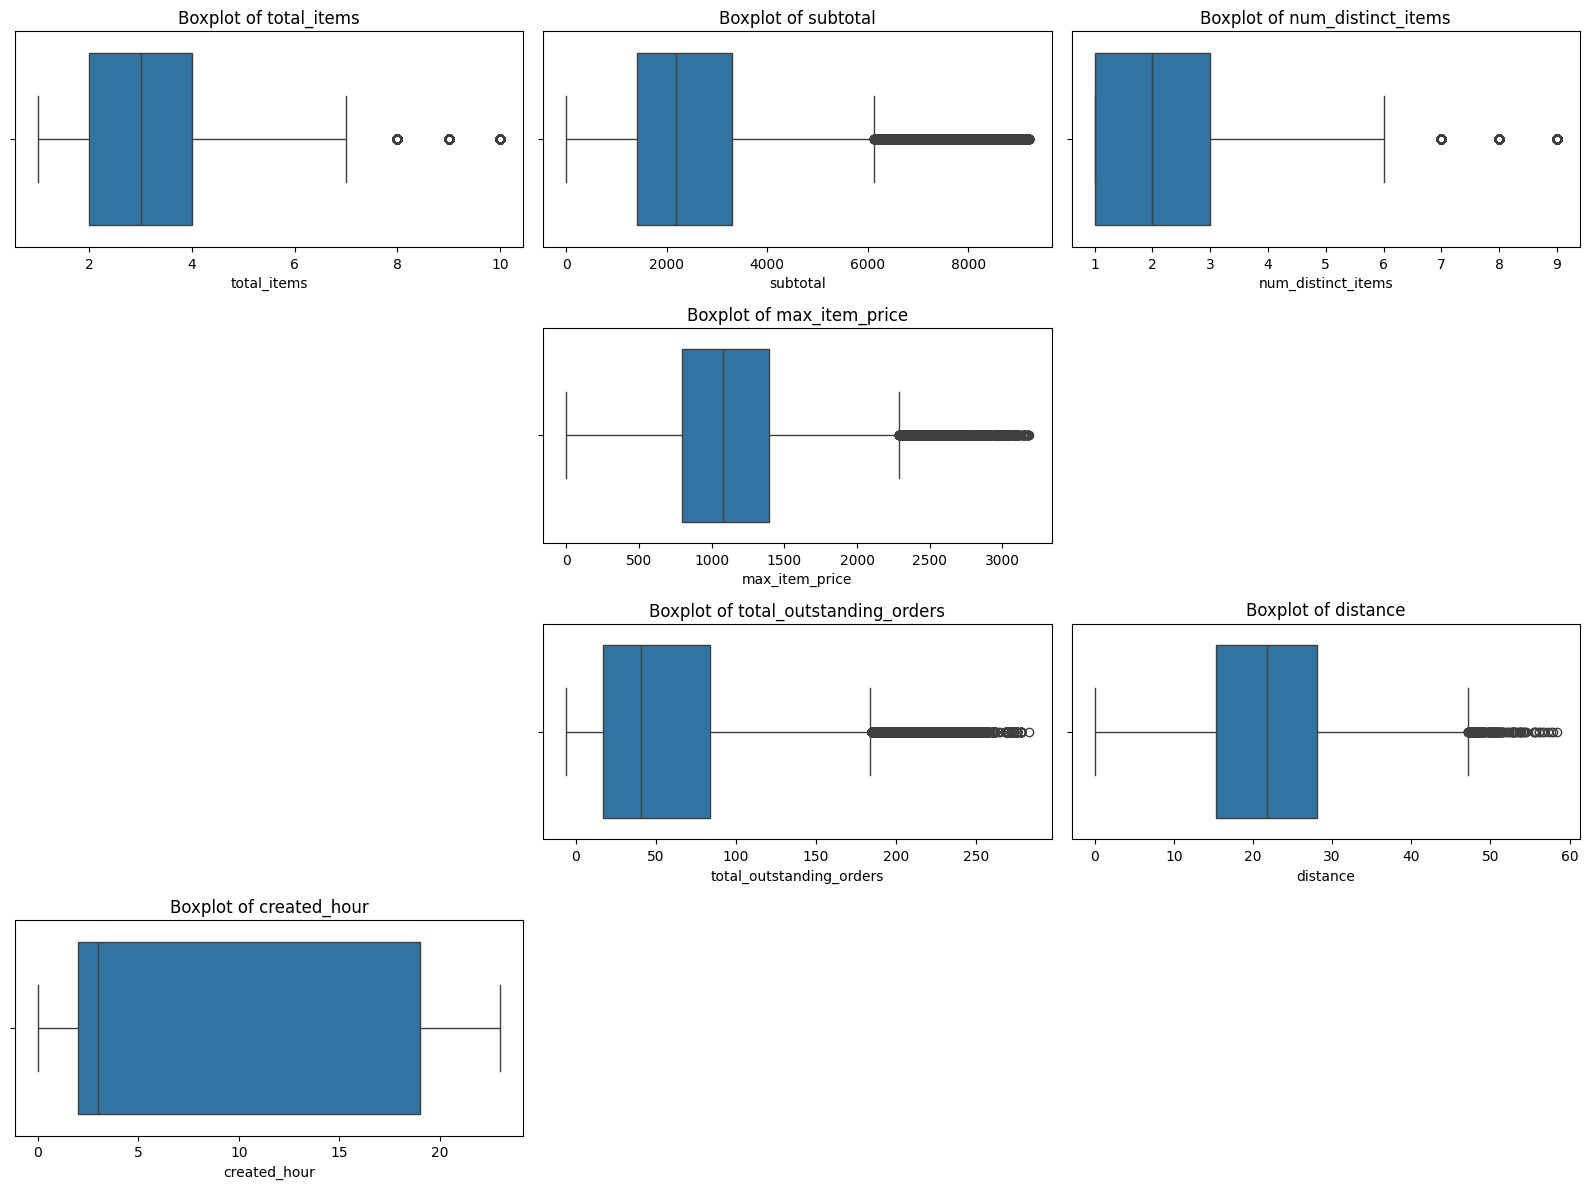

In [ ]:
# Reviewing boxplots after outlier removal

plt.figure(figsize=(16, 12))

# Iterate over all numerical columns and plot each, if present in df
for i, col in enumerate(numerical_cols):
    if col in train_data.columns:  # Check if the column exists in the dataframe
        plt.subplot(4, 3, i + 1)  # Adjust the number of rows and columns based on your data
        sns.boxplot(data=train_data, x=col)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()

plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

# Ensure that numerical_cols only includes columns that are present in train_data
numerical_cols = [col for col in numerical_cols if col in train_data.columns]

# Apply MinMax scaling to the numerical columns in train_data
scaler = MinMaxScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

# Check the result
print(train_data[numerical_cols].head())


        total_items  subtotal  num_distinct_items  max_item_price  \
42111      0.000000  0.146739                0.00        0.424528   
58452      0.444444  0.465761                0.50        0.283019   
20644      0.555556  0.856522                0.25        0.455975   
79735      0.222222  0.397826                0.25        0.455975   
167933     0.444444  0.932065                0.50        0.825472   

        total_outstanding_orders  distance  created_hour  
42111                   0.086505  0.164384      0.869565  
58452                   0.737024  0.591781      0.086957  
20644                   0.418685  0.597945      0.130435  
79735                   0.619377  0.441096      0.086957  
167933                  0.231834  0.303425      0.086957  


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model

# Model 1

# Split features and target again from the processed train_data
X_train_model = train_data.drop(columns=['delivery_time'])
y_train_model = train_data['delivery_time']

# Add constant
X_train_sm = sm.add_constant(X_train_model)

# Fit the model
model_statsmodels = sm.OLS(y_train_model, X_train_sm).fit()


In [ ]:
# Train the model using the training data

# Print the model summary
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.403e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        09:30:39   Log-Likelihood:            -4.3280e+05
No. Observations:              135024   AIC:                         8.656e+05
Df Residuals:                  135012   BIC:                         8.658e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
# Make predictions


# Ensure column match with model features
X_train = train_data.drop(columns=['delivery_time'])
y_train = train_data['delivery_time']


# Get exact column names (with constant) used in the original trained model
model_features = model_statsmodels.model.exog_names  # includes 'const'

# Apply scaling to numerical columns in both sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Add constant to both sets
X_train_sm = sm.add_constant(X_train_scaled, has_constant='add')
X_test_sm = sm.add_constant(X_test_scaled, has_constant='add')

# Subset and reorder columns to match the trained model
X_train_sm = X_train_sm[model_features]
X_test_sm = X_test_sm[model_features]

# Make predictions
y_train_pred = model_statsmodels.predict(X_train_sm)
y_test_pred = model_statsmodels.predict(X_test_sm)

In [ ]:
# Find results for evaluation metrics

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train RMSE: 17.601684319880324
Test RMSE: 6.32463847305159
Train MAE: 15.439796054245965
Test MAE: 4.884377307763597
Train R²: -3.0580179939230376
Test R²: 0.5416636393892758


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model

X_test = X_test.drop(columns=['total_onshift_dashers', 'min_item_price', 'total_busy_dashers'])


# Store results
rfe_results = []

# Loop through feature counts
for k in range(1, X_train.shape[1] + 1):
    # Set up model and RFE
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=k)
    rfe.fit(X_train, y_train)

    # Transform training and test sets
    X_train_rfe = X_train.loc[:, rfe.support_]
    X_test_rfe = X_test.loc[:, rfe.support_]

    # Fit model on selected features
    lm.fit(X_train_rfe, y_train)

    # Predict
    y_train_pred = lm.predict(X_train_rfe)
    y_test_pred = lm.predict(X_test_rfe)

    # Evaluate
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store the result
    rfe_results.append({
        'n_features': k,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    })

# Convert results to DataFrame
rfe_results_df = pd.DataFrame(rfe_results)
print(rfe_results_df)


    n_features  train_r2       test_r2  train_rmse     test_rmse
0            1  0.221693 -4.653789e+03    7.708549    637.372823
1            2  0.357520 -4.584263e+07    7.003692  63252.593765
2            3  0.458030 -3.601027e+07    6.432573  56060.468156
3            4  0.485716 -2.955418e+07    6.266121  50787.053451
4            5  0.488873 -2.036346e+07    6.246858  42156.966477
5            6  0.499853 -1.962515e+07    6.179397  41385.671924
6            7  0.524367 -1.802268e+07    6.026059  39660.045094
7            8  0.524491 -1.692682e+07    6.025268  38435.390017
8            9  0.533398 -1.654590e+07    5.968571  38000.455362
9           10  0.533420 -1.698314e+07    5.968431  38499.271491
10          11  0.533452 -1.688831e+07    5.968228  38391.636688


In [ ]:
# Loop through the number of features and test the model

# Fit RFE with 7 features
X_rfe = train_data.drop(columns=['delivery_time'])  # only cleaned features
y_rfe = train_data['delivery_time']

rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(X_rfe, y_rfe)

selected_features = X_rfe.columns[rfe.support_]
print("Top 8 selected features:\n", selected_features.tolist())


Top 8 selected features:
 ['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'created_hour', 'isWeekend']


In [ ]:
# Build the final model with selected number of features

# Use only the selected features from RFE
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Add constant for statsmodels
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# Fit the OLS model
final_model = sm.OLS(y_train, X_train_rfe_sm).fit()

# Print summary
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        09:30:47   Log-Likelihood:            -4.3409e+05
No. Observations:              135024   AIC:                         8.682e+05
Df Residuals:                  135015   BIC:                         8.683e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

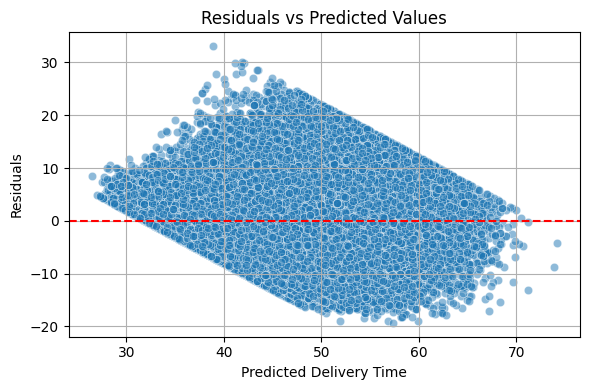

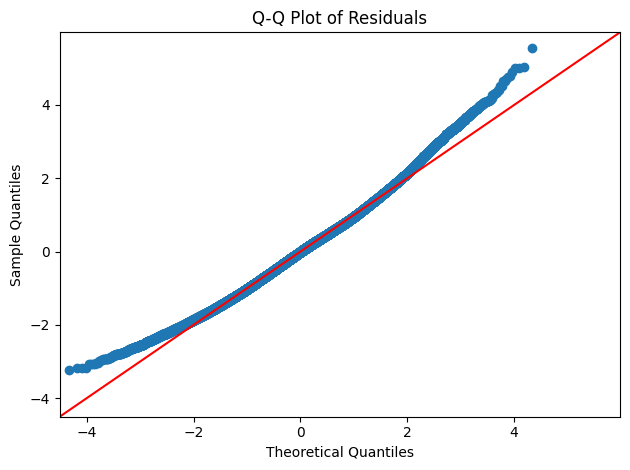

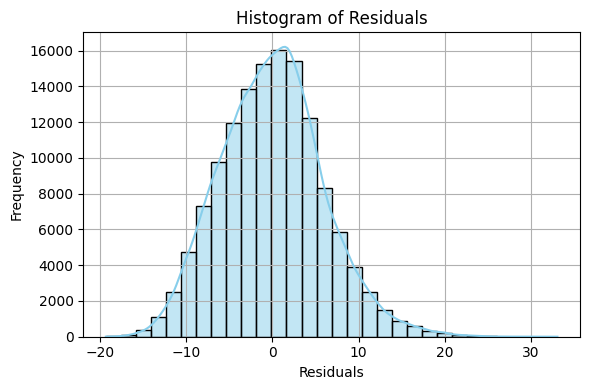

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residuals
residuals = y_train - y_train_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Delivery Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Q-Q Plot (for normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

import pandas as pd

# Scaled coefficients from your final model summary
scaled_coeffs = {
    'order_protocol': -0.9228,
    'subtotal': 11.6572,
    'num_distinct_items': 3.5390,
    'total_outstanding_orders': 13.3786,
    'distance': 26.0523,
    'created_hour': -4.1362,
    'isWeekend': 1.9181
}

# Replace these min/max values with actual values from your unscaled data
feature_ranges = {
    'order_protocol': (1, 6),
    'subtotal': (95, 9200),
    'num_distinct_items': (1, 9),
    'total_outstanding_orders': (0, 283),
    'distance': (0.5, 58),
    'created_hour': (0, 23),
    'isWeekend': (0, 1)  # binary
}

# Compute unscaled coefficients
rows = []
for feature, coeff in scaled_coeffs.items():
    min_val, max_val = feature_ranges[feature]
    range_val = max_val - min_val
    if range_val != 0:
        unscaled = coeff / range_val
    else:
        unscaled = None
    rows.append({
        'Feature': feature,
        'Scaled Coefficient': round(coeff, 4),
        'Original Min': min_val,
        'Original Max': max_val,
        'Unscaled Coefficient (per unit)': round(unscaled, 6) if unscaled else None
    })

# Create a DataFrame and print it
coeff_df = pd.DataFrame(rows)
print("Scaled vs Unscaled Coefficient Comparison:\n")
print(coeff_df.to_string(index=False))


Scaled vs Unscaled Coefficient Comparison:

                 Feature  Scaled Coefficient  Original Min  Original Max  Unscaled Coefficient (per unit)
          order_protocol             -0.9228           1.0             6                        -0.184560
                subtotal             11.6572          95.0          9200                         0.001280
      num_distinct_items              3.5390           1.0             9                         0.442375
total_outstanding_orders             13.3786           0.0           283                         0.047274
                distance             26.0523           0.5            58                         0.453083
            created_hour             -4.1362           0.0            23                        -0.179835
               isWeekend              1.9181           0.0             1                         1.918100


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

def interpret_unit_change(feature_name, coeff_scaled, min_val, max_val):
    range_val = max_val - min_val
    delta_scaled = 1 / range_val
    impact = coeff_scaled * delta_scaled
    return round(impact, 4)

# Apply to 'distance'
feature = 'distance'
coef_scaled = 26.0523
min_val = 0.5
max_val = 58

unit_effect = interpret_unit_change(feature, coef_scaled, min_val, max_val)
print(f"A +1 unit increase in '{feature}' increases delivery time by ~{unit_effect} minutes.")



A +1 unit increase in 'distance' increases delivery time by ~0.4531 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>


Yes, the dataset contains below categorical variables:

1. market_id

2. store_primary_category

3. order_protocol

4. isWeekend

Based on model coefficients and analysis, order_protocol and isWeekend were found to have a significant impact on delivery time. Orders placed through more efficient protocols were delivered faster, while weekend orders tended to experience higher delivery times.

From EDA and model interpretation, we observed:

-order_protocol:
 Strong negative coefficient in the final model (-0.92). Suggests that higher protocol values (e.g., digital channels) are associated with faster deliveries.

-isWeekend:
 Positive coefficient (+1.92). Means deliveries take ~2 minutes longer on weekends, likely due to higher demand or traffic.

-market_id and store_primary_category:
 Were considered during feature selection, but ultimately not included in the final model. This suggests their direct effect was weaker after accounting for stronger predictors.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

The parameter test_size=0.2 means that 20% of the data is allocated to the test set. The remaining 80% is used as the training set. This split allows for a reliable evaluation of the model’s performance on unseen data.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has the strongest correlation with delivery_time. Correaltion is 0.46.
The insight is that longer delivery distances tend to result in longer delivery times.



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Outlier Detection:
I used boxplots and the Interquartile Range (IQR) method to visually and statistically identify outliers in the target variable and numerical features.

Outlier Handling:
I capped the target variable delivery_time at 72 minutes. I removed extreme values from the features using the IQR rule, filtering values outside the [Q1 - 3*IQR, Q3 + 3*IQR] range.

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Based on the final linear regression model, the top three features significantly affecting delivery time are:

1. Distance — Deliveries over longer distances take substantially more time.

2. Total Outstanding Orders — A higher number of pending orders at the time of placement delays delivery.

3. Subtotal — Larger order values tend to require more preparation, increasing delivery time.



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Definition-
Linear Regression is a supervised machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables or features.

Objective-
To find the best-fitting straight line that can predict the target variable using the input features.

Equation for multiple features-
y^ =β0 +β1 x1 +β2 x2 +⋯+βn xn

It works as-
1. Initialize coefficients: Start with some guess values (often 0).
2. Make predictions: Using the linear equation.
3. Calculate error: Error=y−y^
4. Define Mean Squared Error (MSE):
5. Minimize the loss by using methods like Ordinary Least Squares (OLS) to find the coefficients that minimize the MSE.

Assumptions of Linear Regression-
1. Linearity: Relationship between features and target is linear.
2. Independence: Observations are independent.
3. Homoscedasticity: Constant variance of residuals.
4. Normality: Residuals should be normally distributed.
5. No multicollinearity: Features should not be highly correlated with each other.

Use Cases-
Predicting delivery time
Forecasting sales or prices
Analyzing trends and relationships in data


##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple Linear Regression-

Models the relationship between one independent variable and one dependent variable. The relationship is represented by a straight line in 2D.
Equation:
y^ =β0 +β1 x
Example:
Predicting delivery time based only on distance.


Multiple Linear Regression-

Models the relationship between two or more independent variables and one dependent variable.
The line becomes a hyperplane in higher dimensions.
Equation:
y^ =β0 +β1 x1 +β2 x2 +⋯+βn xn
here, x1,x2,...,xn are multiple input features
Example:
Predicting delivery time based on distance, number of items, order protocol, time of day, etc.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


A cost function in linear regression measures how far off the model's predictions are from the actual target values.
Its role is to quantify the error between predicted values (𝑦^) and actual values (y).
Most Common Cost Function: Mean Squared Error (MSE). This function penalizes larger errors more due to squaring.

The Cost Function is minimized by two main ways:

1. Ordinary Least Squares (OLS)
A closed-form solution that calculates coefficients (β) directly to minimize MSE. It is fast and exact for small-to-medium datasets.

2. Gradient Descent
Used when datasets are large or many features exist. Gradually updates coefficients in the direction that reduces the cost.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting-
The model learns too much from the training data, including noise and outliers.
Performs very well on training data
Performs poorly on unseen test data
The model is too complex (too many features or interactions)

Overfitting Example:
A model with high-degree polynomial terms that perfectly follows training points but fails to generalize.

Underfitting-
The model is too simple to capture the underlying patterns in the data.
Performs poorly on both training and test data
Misses important relationships between variables
Often caused by using too few features or an overly basic model

Underfitting Example:
A straight line trying to fit a curved trend.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**


A residual is the difference between the actual value and the predicted value. Residuals tell us how far off your predictions are for each data point.
A residual plot displays:
1. Predicted values on the X-axis
2. Residuals (errors) on the Y-axis

Residual Plots help in below ways-
1. Check Linearity
If residuals are randomly scattered around 0. Then linear relationship assumed in linear regression is valid.

If there is a pattern (e.g., curve), then model may be missing nonlinear trends.

2. Detect Heteroscedasticity
If the spread of residuals increases/decreases with predictions, then variance is not constant.

This violates an assumption of linear regression and can distort model interpretation.

3. Identify Outliers or Influential Points
Large residuals far from 0 may signal outliers or unusual data points.

4. Check Independence of Errors
Random scatter suggests residuals are independent. Patterns could mean errors are autocorrelated (e.g., time series).